In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')#ignores any warnings during execution
train=pd.read_csv('Downloads/train_ctrUa4K.csv')#train df
test=pd.read_csv("Downloads/test_lAUu6dG.csv")#test df

In [ ]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [ ]:
train_original=train.copy()#to copy the df
test_original=test.copy()

In [ ]:
train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [ ]:
test.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

In [ ]:
train.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [ ]:
train.shape

(614, 13)

In [ ]:
test.shape

(367, 12)

In [ ]:
train.Loan_Status.value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [ ]:
train.Loan_Status.value_counts(normalize=True)*100#percentage of approvals and disapprovals

Y    68.729642
N    31.270358
Name: Loan_Status, dtype: float64

# Univariate Analysis

<Axes: >

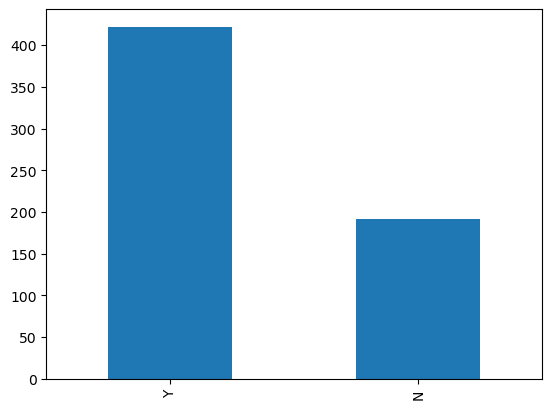

In [ ]:
train.Loan_Status.value_counts().plot.bar()

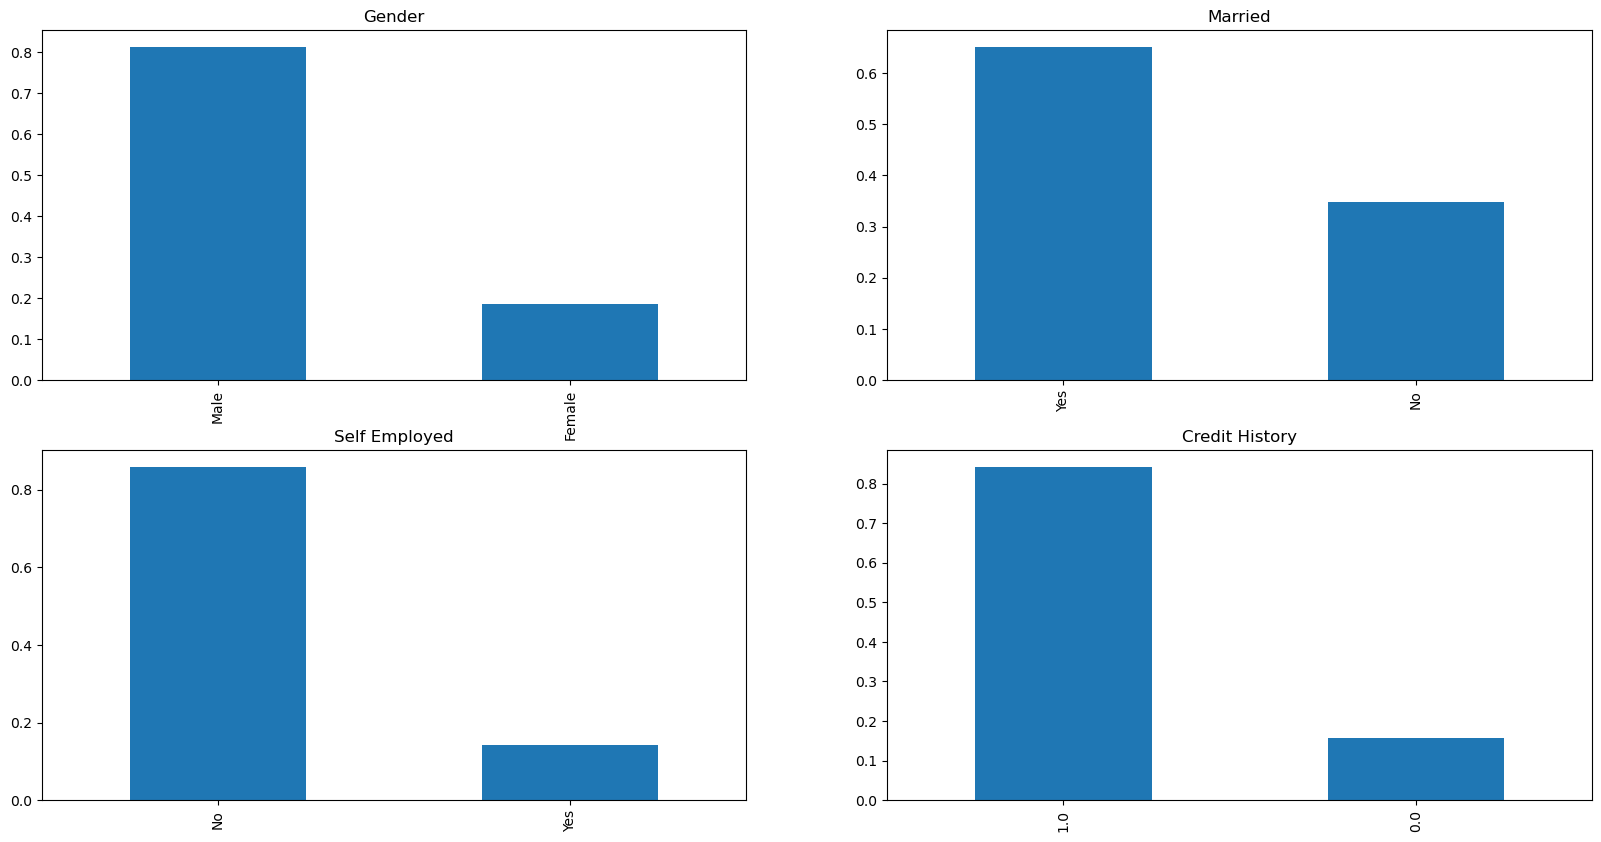

In [ ]:
plt.figure(1)
plt.subplot(221)# here 2-nrows,2-n-columns,1-index of the subplot
train.Gender.value_counts(normalize=True).plot.bar(figsize=(20,10),title='Gender')
plt.subplot(222)
train.Married.value_counts(normalize=True).plot.bar(figsize=(20,10),title='Married')
plt.subplot(223)
train.Self_Employed.value_counts(normalize=True).plot.bar(figsize=(20,10),title='Self Employed')
plt.subplot(224)
train.Credit_History.value_counts(normalize=True).plot.bar(figsize=(20,10),title='Credit History')
plt.show()

<Axes: title={'center': 'Property Area'}>

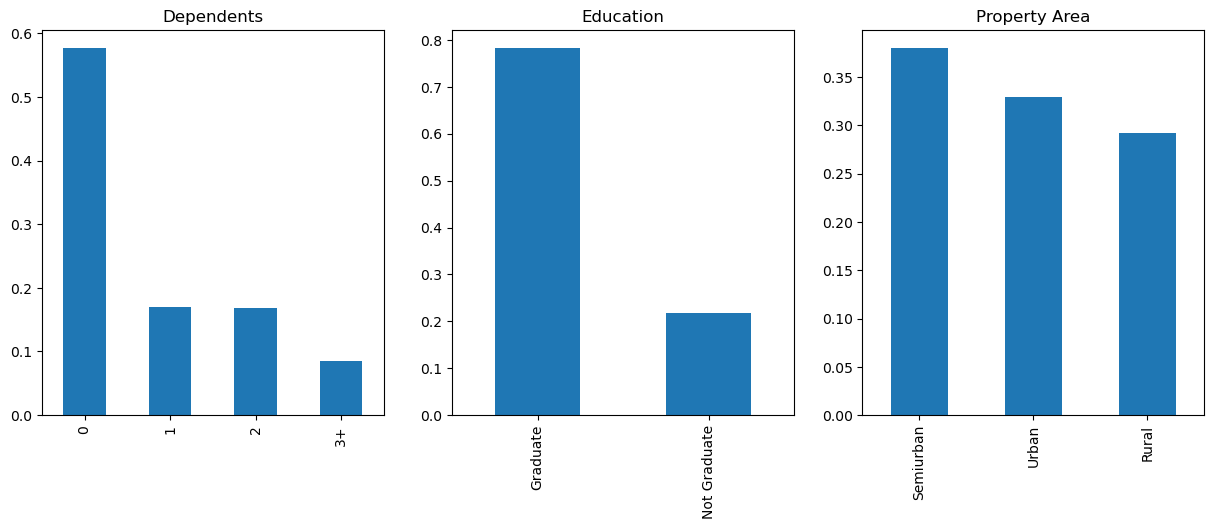

In [ ]:
plt.figure(1)
plt.subplot(131)
train.Dependents.value_counts(normalize=True).plot.bar(figsize=(10,15),title='Dependents')
plt.subplot(132)
train.Education.value_counts(normalize=True).plot.bar(figsize=(10,15),title='Education')
plt.subplot(133)
train.Property_Area.value_counts(normalize=True).plot.bar(figsize=(15,5),title='Property Area')

<Axes: >

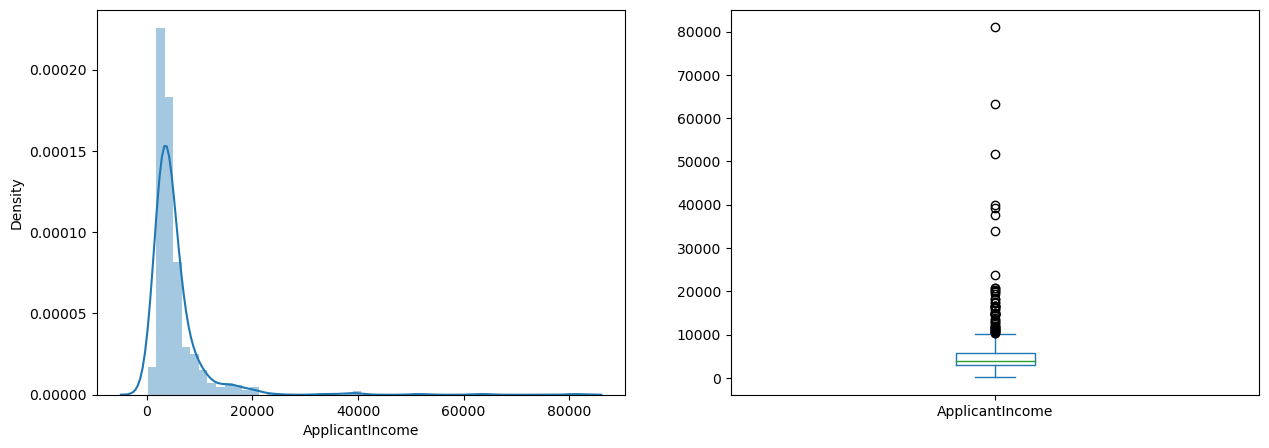

In [ ]:
plt.figure(1)
plt.subplot(121)
sns.distplot(train.ApplicantIncome)
plt.subplot(122)
train.ApplicantIncome.plot.box(figsize=(15,5))

<Axes: >

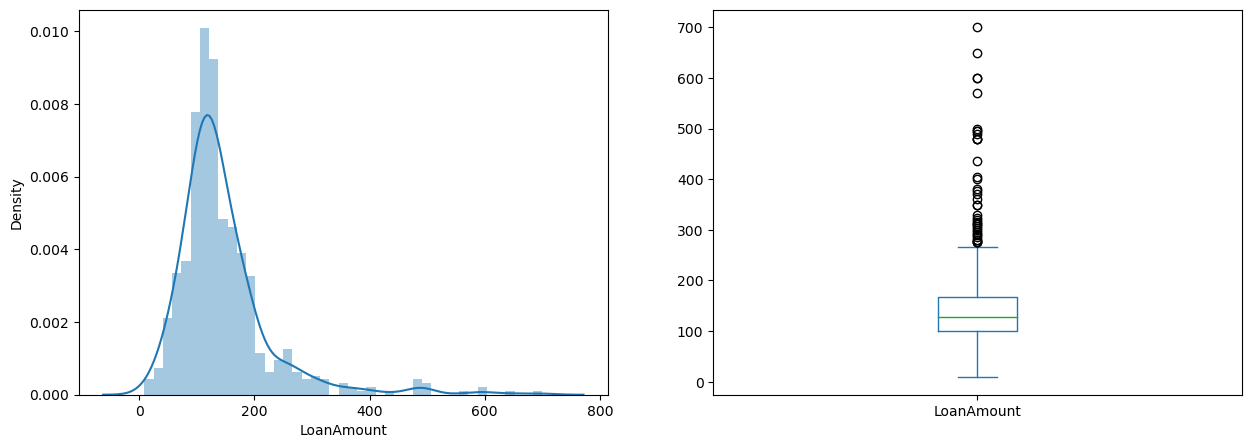

In [ ]:
plt.figure(1)
plt.subplot(121)
sns.distplot(train.LoanAmount)
plt.subplot(122)
train.LoanAmount.plot.box(figsize=(15,5))

# Bivariate Analysis

<Axes: xlabel='Gender'>

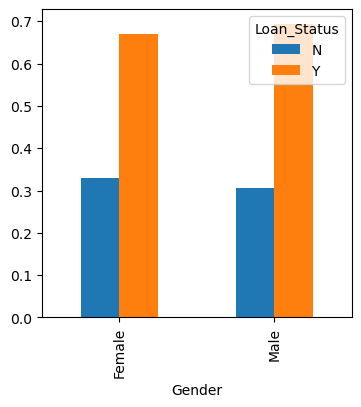

In [ ]:
gender=pd.crosstab(train.Gender,train.Loan_Status)
gender.div(gender.sum(1).astype(float),axis=0).plot(kind='bar',figsize=(4,4))

<Axes: xlabel='Self_Employed'>

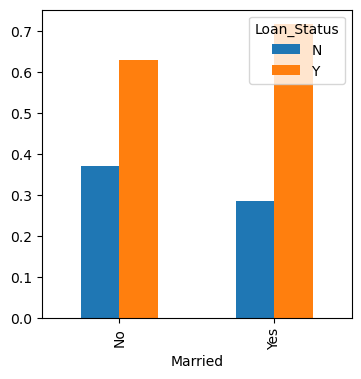

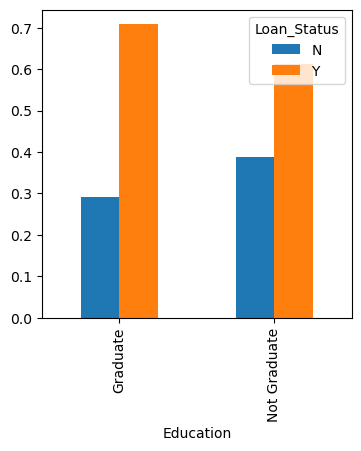

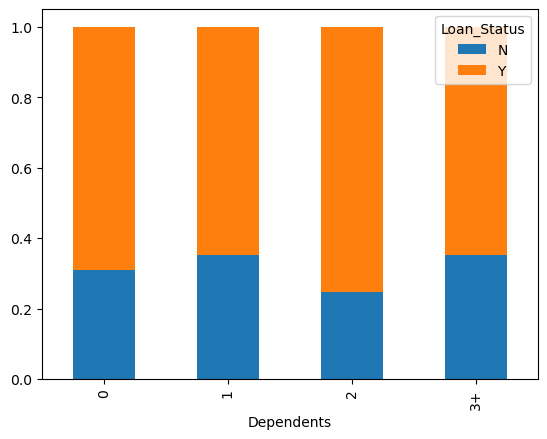

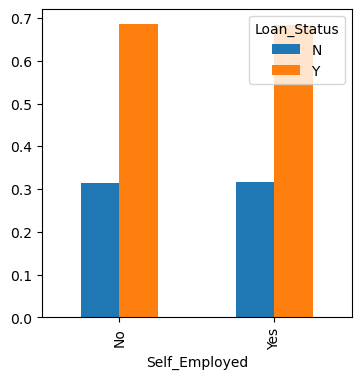

In [ ]:
dependents=pd.crosstab(train.Dependents,train.Loan_Status)
education=pd.crosstab(train.Education,train.Loan_Status)
married=pd.crosstab(train.Married,train.Loan_Status)
self_employed=pd.crosstab(train.Self_Employed,train.Loan_Status)
married.div(married.sum(1).astype(float),axis=0).plot(kind='bar',figsize=(4,4))
education.div(education.sum(1).astype(float),axis=0).plot(kind='bar',figsize=(4,4))
dependents.div(dependents.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True)
self_employed.div(self_employed.sum(1).astype(float),axis=0).plot(kind='bar',figsize=(4,4))

<Axes: xlabel='Property_Area'>

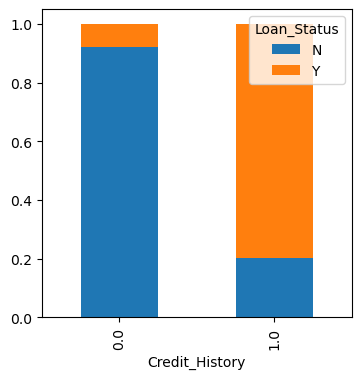

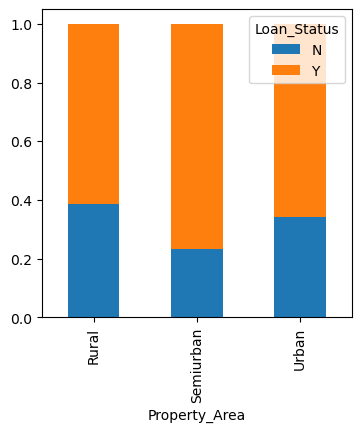

In [ ]:
credit_history=pd.crosstab(train.Credit_History,train.Loan_Status)
credit_history.div(credit_history.sum(1).astype(float),axis=0).plot(kind='bar',figsize=(4,4),stacked=True)
property_area=pd.crosstab(train.Property_Area,train.Loan_Status)
property_area.div(property_area.sum(1).astype(float),axis=0).plot(kind='bar',figsize=(4,4),stacked=True)

<Axes: xlabel='Loan_Status'>

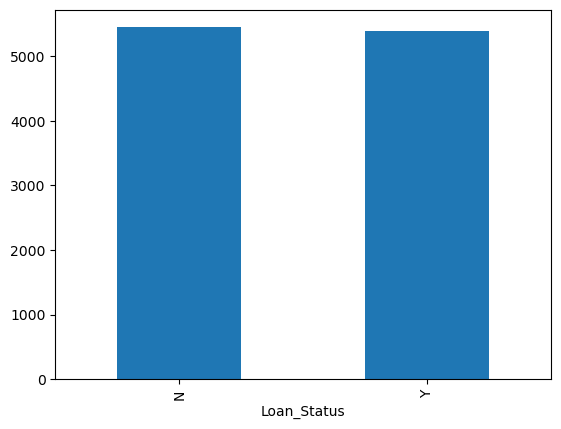

In [ ]:
train.groupby('Loan_Status')['ApplicantIncome'].mean().plot.bar()

In [ ]:
bins=[0,2500,4000,6000,81000]
group=['Low','Average','High','Very High']
train.Income_bin=pd.cut(train.ApplicantIncome,bins,labels=group)

<Axes: xlabel='ApplicantIncome'>

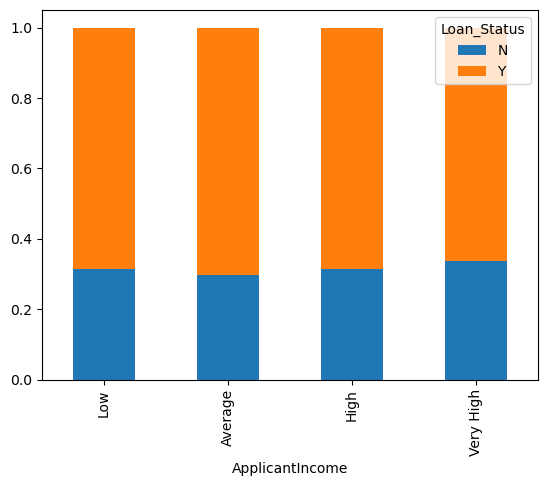

In [ ]:
bins=[0,2500,4000,6000,81000]
group=['Low','Average','High','Very High']
train.Income_bin=pd.cut(train.ApplicantIncome,bins,labels=group)
income_bin=pd.crosstab(train.Income_bin,train.Loan_Status)
income_bin.div(income_bin.sum(1).astype(float),axis=0).plot.bar(stacked=True)

<Axes: xlabel='CoapplicantIncome'>

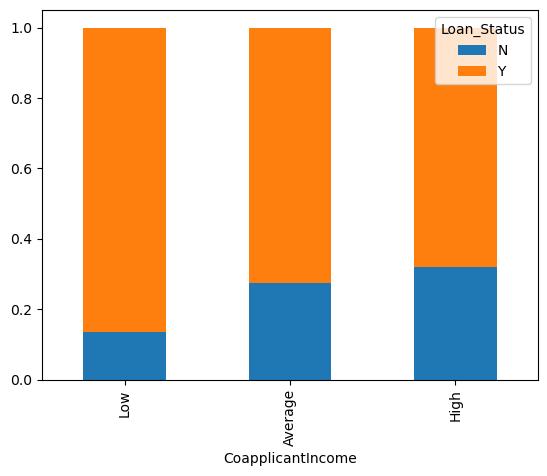

In [ ]:
bins=[0,1000,3000,4200]
group=['Low','Average','High']
train.Coapplicant_Income_bin=pd.cut(train.CoapplicantIncome,bins,labels=group)
coapplicant_income_bin=pd.crosstab(train.Coapplicant_Income_bin,train.Loan_Status)
coapplicant_income_bin.div(coapplicant_income_bin.sum(1).astype(float),axis=0).plot.bar(stacked=True)

<Axes: xlabel='Total_Income_bin'>

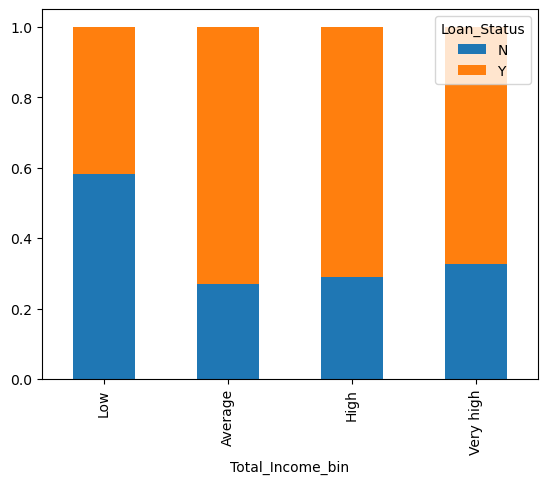

In [ ]:
train['Total_Income']=train['ApplicantIncome']+train['CoapplicantIncome']
bins=[0,2500,4000,6000,81000]
group=['Low','Average','High', 'Very high']
train['Total_Income_bin']=pd.cut(train['Total_Income'],bins,labels=group)
Total_Income_bin=pd.crosstab(train['Total_Income_bin'],train['Loan_Status'])
Total_Income_bin.div(Total_Income_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)


<Axes: xlabel='LoanAmount'>

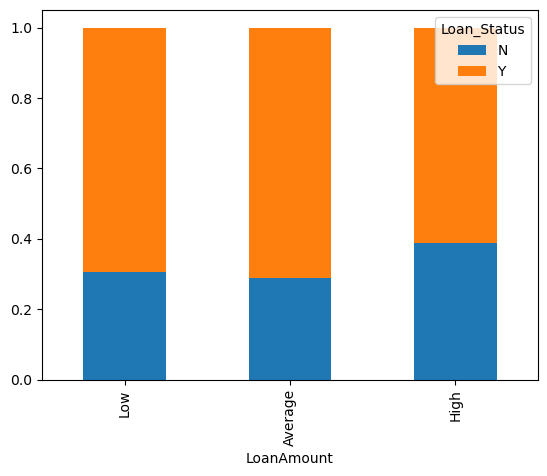

In [ ]:
bins=[0,100,200,700]
group=['Low','Average','High']
train.LoanAmount_bin=pd.cut(train.LoanAmount,bins,labels=group)
LoanAmount_bin=pd.crosstab(train.LoanAmount_bin,train.Loan_Status)
LoanAmount_bin.div(LoanAmount_bin.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True)



In [ ]:
train.drop(['Total_Income','Total_Income_bin'],axis=1,inplace=True)

In [ ]:
train.Dependents.replace('3+',3,inplace=True)
test.Dependents.replace('3+',3,inplace=True)
train.Loan_Status.replace('N',0,inplace=True)
train.Loan_Status.replace('Y',1,inplace=True)

<Axes: >

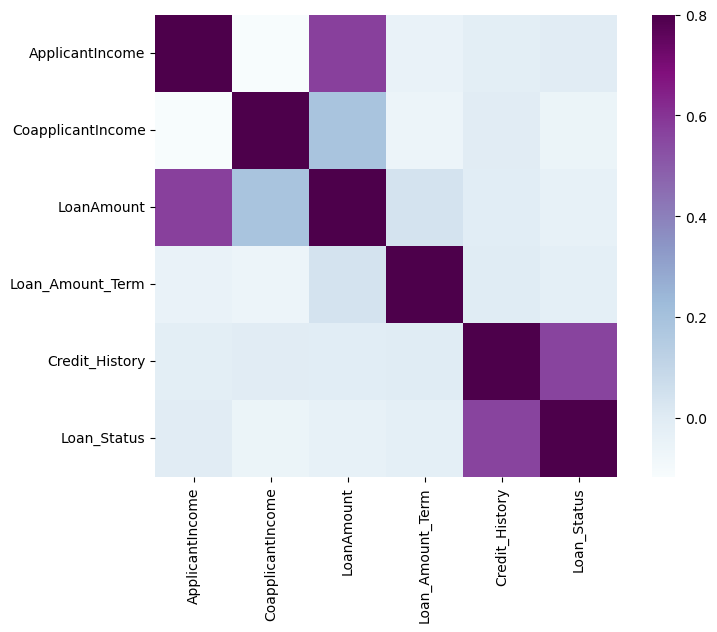

In [ ]:
matirx=train.corr()
f,ax=plt.subplots(figsize=(9,6))
sns.heatmap(matirx,vmax=.8,square=True,cmap='BuPu')

In [ ]:
train.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [ ]:
train.Gender.fillna(train.Gender.mode()[0],inplace=True)
train.Married.fillna(train.Married.mode()[0],inplace=True)
train.Dependents.fillna(train.Dependents.mode()[0],inplace=True)
train.Self_Employed.fillna(train.Self_Employed.mode()[0],inplace=True)
train.Credit_History.fillna(train.Credit_History.mode()[0],inplace=True)

In [ ]:
train.isna().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [ ]:
train.Loan_Amount_Term.value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [ ]:
train.Loan_Amount_Term.fillna(train.Loan_Amount_Term.mode()[0],inplace=True)

In [ ]:
train.LoanAmount.fillna(train.LoanAmount.median(),inplace=True)# as loanamount has lot of outliers we are using median instead of mean

In [ ]:
train.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [ ]:
test['Gender'].fillna(train['Gender'].mode()[0], inplace=True)
test['Dependents'].fillna(train['Dependents'].mode()[0], inplace=True)
test['Self_Employed'].fillna(train['Self_Employed'].mode()[0], inplace=True)
test['Credit_History'].fillna(train['Credit_History'].mode()[0], inplace=True)
test['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0], inplace=True)
test['LoanAmount'].fillna(train['LoanAmount'].median(), inplace=True)

In [ ]:
test.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

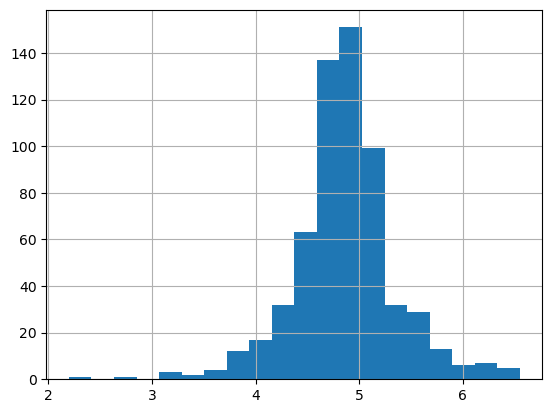

In [ ]:
train['loanamount_log']=np.log(train.LoanAmount) # it creates new colum which contain log values of Loan Amount with outliers reduced
train.loanamount_log.hist(bins=20)
test['loanamount_log']=np.log(test.LoanAmount)

In [ ]:
train=train.drop('Loan_ID',axis=1)# it does not have any effect on loan status hence dropped
test=test.drop('Loan_ID',axis=1)

In [ ]:
X=train.drop('Loan_Status',1)#sicketlearn requires target variable in separate database
y=train.Loan_Status

In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
X['Gender']=encoder.fit_transform(X['Gender'])
X['Married']=encoder.fit_transform(X['Married'])
X['Education']=encoder.fit_transform(X['Education'])
X['Self_Employed']=encoder.fit_transform(X['Self_Employed'])
X['Property_Area']=encoder.fit_transform(X['Property_Area'])
test['Gender']=encoder.fit_transform(test['Gender'])
test['Married']=encoder.fit_transform(test['Married'])
test['Education']=encoder.fit_transform(test['Education'])
test['Self_Employed']=encoder.fit_transform(test['Self_Employed'])
test['Property_Area']=encoder.fit_transform(test['Property_Area'])
train['Gender']=encoder.fit_transform(train['Gender'])
train['Married']=encoder.fit_transform(train['Married'])
train['Education']=encoder.fit_transform(train['Education'])
train['Self_Employed']=encoder.fit_transform(train['Self_Employed'])
train['Property_Area']=encoder.fit_transform(train['Property_Area'])

In [ ]:
from sklearn.model_selection import train_test_split# cv cross validation,x-indepndent variables,y-target variable
x_train,x_cv,y_train,y_cv= train_test_split(X,y,test_size=0.3)#30% is for cv and 70% data used for training

In [ ]:
x_train

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,loanamount_log
0,1,0,0,0,0,5849,0.0,128.0,360.0,1.0,2,4.852030
611,1,1,1,0,0,8072,240.0,253.0,360.0,1.0,2,5.533389
527,1,1,1,1,0,5285,1430.0,161.0,360.0,0.0,1,5.081404
412,1,1,0,1,0,6096,0.0,218.0,360.0,0.0,0,5.384495
444,1,1,0,0,0,7333,8333.0,175.0,300.0,1.0,0,5.164786
...,...,...,...,...,...,...,...,...,...,...,...,...
594,1,1,0,0,1,16120,0.0,260.0,360.0,1.0,2,5.560682
492,1,0,0,1,0,3691,0.0,110.0,360.0,1.0,0,4.700480
236,1,1,0,0,0,5746,0.0,255.0,360.0,1.0,2,5.541264
172,1,1,3,1,0,3522,0.0,81.0,180.0,1.0,0,4.394449


In [ ]:
x_cv

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,loanamount_log,Total_Income,logtotal_income,EMI,Balance_Income
271,1,1,0,0,0,1.0,2,0.111795,0.638624,1.192350,-0.187793,0.641947
162,1,1,1,0,0,0.0,1,-0.124013,-0.411520,-0.527165,-0.269378,-0.410563
545,1,1,0,0,0,1.0,0,0.375662,-0.357440,-0.386065,-0.084453,-0.357796
44,1,1,0,1,1,1.0,2,-0.591015,-0.361004,-0.395038,-0.405352,-0.358823
306,0,0,0,0,0,1.0,0,0.096904,-0.247421,-0.128682,-0.193232,-0.246597
...,...,...,...,...,...,...,...,...,...,...,...,...
239,1,1,1,0,0,1.0,1,-0.591015,-0.574845,-1.034046,-0.405352,-0.573277
45,0,0,0,0,0,1.0,2,-0.766585,-0.560124,-0.982170,-0.448863,-0.558169
472,1,1,3,0,0,1.0,1,-0.508645,-0.361624,-0.396602,-0.383596,-0.359617
366,1,0,0,0,0,1.0,1,-0.591015,-0.701135,-1.552109,-0.535887,-0.698894


In [ ]:
y_train

530    1
352    1
290    1
143    1
392    1
      ..
561    1
299    0
305    0
118    0
241    0
Name: Loan_Status, Length: 429, dtype: int64

In [ ]:
y_cv

271    1
162    0
545    1
44     1
306    1
      ..
239    1
45     1
472    1
366    0
368    1
Name: Loan_Status, Length: 185, dtype: int64

# Model Building

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

In [ ]:
pred_cv=model.predict(x_cv)
pred_cv

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 1, 0, 1, 1], dtype=int64)

In [ ]:
accuracy_score(y_cv,pred_cv)#checking accuracy of the model

0.8162162162162162

In [ ]:
pred_testdata=model.predict(test)

In [ ]:
submission=pd.read_csv("Downloads/sample_submission_49d68Cx.csv")

In [ ]:
submission.Loan_Status=pred_testdata
submission.Loan_ID=test_original.Loan_ID

In [ ]:
pd.DataFrame(submission, columns=['Loan_ID','Loan_Status']).to_csv('logisticRG.csv')

# predicting using stratified K-Fold

In [ ]:
from sklearn.model_selection import StratifiedKFold
i=1
kf = StratifiedKFold(n_splits=5,random_state=5,shuffle=True) # splitting the ds into 5 folds
for train_index,test_index in kf.split(X,y):#kf.split generates indices for different folds and stored in train_index and test_index
     print('n-{} of kfold {}'.format(i,kf.n_splits))
     xtr,xvl = X.iloc[train_index],X.iloc[test_index]#splitting data into train and validation sets
     ytr,yvl = y.iloc[train_index],y.iloc[test_index]
     model = LogisticRegression(random_state=5)
     model.fit(xtr, ytr)
     pred_test = model.predict(xvl)
     score = accuracy_score(yvl,pred_test)
     print('accuracy_score',score)
     i+=1

pred_test = model.predict(test)
pred=model.predict_proba(xvl)[:,1]

n-1 of kfold 5
accuracy_score 0.8048780487804879
n-2 of kfold 5
accuracy_score 0.7479674796747967
n-3 of kfold 5
accuracy_score 0.8373983739837398
n-4 of kfold 5
accuracy_score 0.8130081300813008
n-5 of kfold 5
accuracy_score 0.8524590163934426


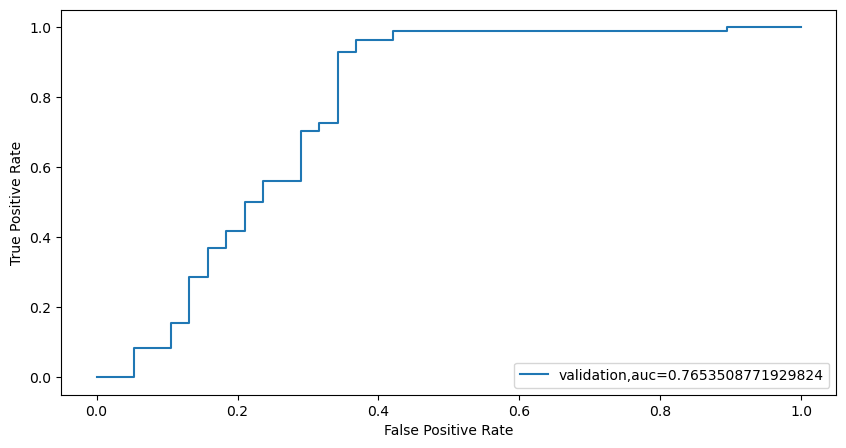

In [ ]:
from sklearn import metrics
fpr,tpr,_=metrics.roc_curve(yvl,pred)#_ is threshold
auc=metrics.roc_auc_score(yvl,pred)
plt.figure(figsize=(10,5))
plt.plot(fpr,tpr,label="validation,auc="+str(auc))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4)
plt.show()

In [ ]:
submission['Loan_Status']=pred_test
submission['Loan_ID']=test_original['Loan_ID']

In [ ]:
pd.DataFrame(submission,columns=['Loan_ID','Loan_Status']).to_csv('Stratified.csv')

# Feature Engineering

In [ ]:
train['Total_Income']=train['ApplicantIncome']+train['CoapplicantIncome']
test['Total_Income']=test['ApplicantIncome']+test['CoapplicantIncome']

<Axes: xlabel='Total_Income', ylabel='Density'>

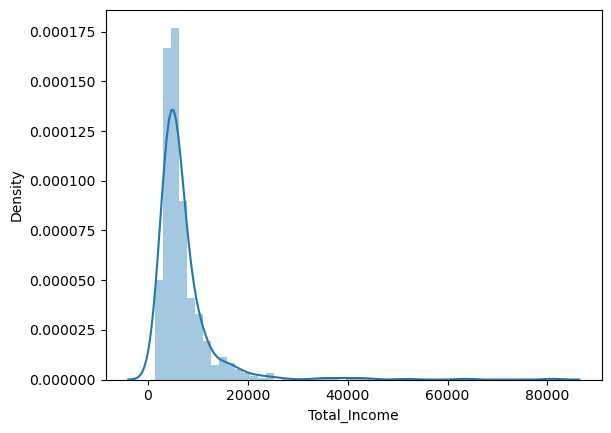

In [ ]:
sns.distplot(train.Total_Income)# not normal dist and right skewed

In [ ]:
train['logtotal_income']=np.log(train.Total_Income)# to convert the curve into nds
test['logtotal_income']=np.log(test.Total_Income)

<Axes: xlabel='logtotal_income', ylabel='Density'>

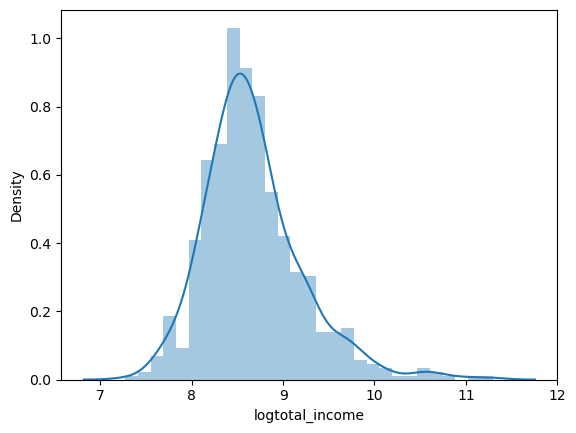

In [ ]:
sns.distplot(train.logtotal_income)

In [ ]:
train['EMI']=train['LoanAmount']/train['Loan_Amount_Term']
test['EMI']=train['LoanAmount']/test['Loan_Amount_Term']

<Axes: xlabel='EMI', ylabel='Density'>

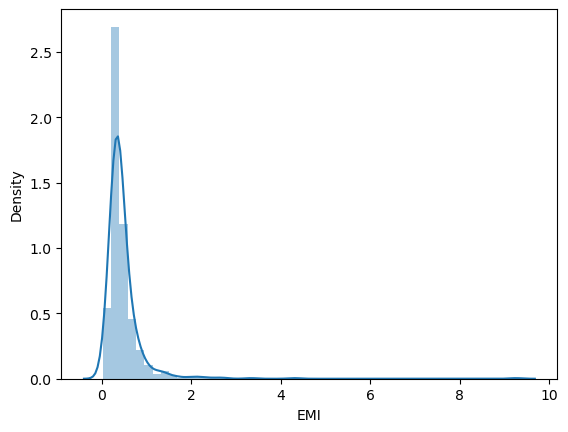

In [ ]:
sns.distplot(train.EMI)

In [ ]:
train['Balance_Income']=train.Total_Income-(train.EMI*100)
test['Balance_Income']=test.Total_Income-(test.EMI*100)

<Axes: xlabel='Balance_Income', ylabel='Density'>

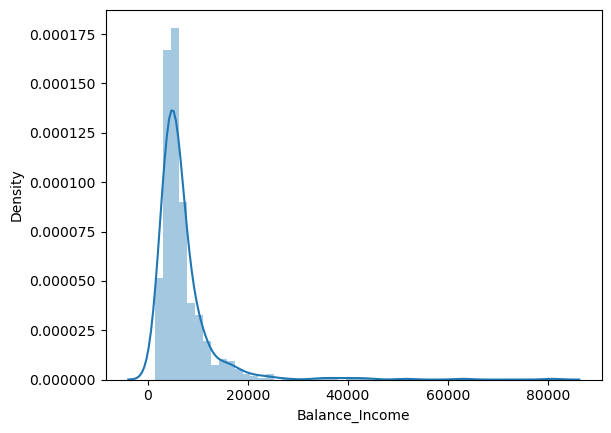

In [ ]:
sns.distplot(train.Balance_Income)

In [ ]:
train.drop(['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term'],axis=1)# because the newly created features and hese will have high correlation which confuses the model
test.drop(['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term'],axis=1,inplace=True)

In [ ]:
X['Total_Income']=train['Total_Income']
X['logtotal_income']=train['logtotal_income']
X['EMI']=train['EMI']
X['Balance_Income']=train['Balance_Income']

In [ ]:
X

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,loanamount_log,Total_Income,logtotal_income,EMI,Balance_Income
0,1,0,0,0,0,5849,0.0,128.0,360.0,1.0,2,4.852030,5849.0,8.674026,0.355556,5813.444444
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,4.852030,6091.0,8.714568,0.355556,6055.444444
2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,4.189655,3000.0,8.006368,0.183333,2981.666667
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,4.787492,4941.0,8.505323,0.333333,4907.666667
4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,4.948760,6000.0,8.699515,0.391667,5960.833333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,2900,0.0,71.0,360.0,1.0,0,4.262680,2900.0,7.972466,0.197222,2880.277778
610,1,1,3,0,0,4106,0.0,40.0,180.0,1.0,0,3.688879,4106.0,8.320205,0.222222,4083.777778
611,1,1,1,0,0,8072,240.0,253.0,360.0,1.0,2,5.533389,8312.0,9.025456,0.702778,8241.722222
612,1,1,2,0,0,7583,0.0,187.0,360.0,1.0,2,5.231109,7583.0,8.933664,0.519444,7531.055556


In [ ]:
X.drop(['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term'],axis=1,inplace=True)# because the newly created features and hese will have high correlation which confuses the model

In [ ]:
train.columns

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Loan_Status', 'Total_Income',
       'loanamount_log', 'Gender_Female', 'Gender_Male', 'Married_No',
       'Married_Yes', 'Dependents_3', 'Dependents_0', 'Dependents_1',
       'Dependents_2', 'Education_Graduate', 'Education_Not Graduate',
       'Self_Employed_No', 'Self_Employed_Yes', 'Property_Area_Rural',
       'Property_Area_Semiurban', 'Property_Area_Urban',
       'Total_Income_bin_Low', 'Total_Income_bin_Average',
       'Total_Income_bin_High', 'Total_Income_bin_Very high',
       'logtotal_income', 'EMI', 'Balance_Income'],
      dtype='object')

In [ ]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_cv,pred_cv)
cm

array([[ 22,  33],
       [  1, 129]], dtype=int64)

In [ ]:
from sklearn.metrics import classification_report
class_report = classification_report(y_cv, pred_cv)
print(class_report)

              precision    recall  f1-score   support

           0       0.96      0.40      0.56        55
           1       0.80      0.99      0.88       130

    accuracy                           0.82       185
   macro avg       0.88      0.70      0.72       185
weighted avg       0.84      0.82      0.79       185



# Decision Tree Classification

In [ ]:
from sklearn import tree# using decision tree model
i=1
kf=StratifiedKFold(n_splits=5,random_state=5,shuffle=True)
for train_index,test_index in kf.split(X,y):
    print("{} of kfold{}".format(i,kf.n_splits))
    train_x,val_x=X.loc[train_index],X.loc[test_index]
    train_y,val_y=y.loc[train_index],y.loc[test_index]
    model=tree.DecisionTreeClassifier(random_state=1)
    model.fit(train_x,train_y)
    pred_test=model.predict(val_x)
    score=accuracy_score(val_y,pred_test)
    print('accuracy_score',score)
    i+=1
pred_test=model.predict(test)

1 of kfold5
accuracy_score 0.7723577235772358
2 of kfold5
accuracy_score 0.6422764227642277
3 of kfold5
accuracy_score 0.7886178861788617
4 of kfold5
accuracy_score 0.7479674796747967
5 of kfold5
accuracy_score 0.7950819672131147


In [ ]:
submission['Loan_Status']=pred_test
submission['Loan_ID']=test_original['Loan_ID']

In [ ]:
submission['Loan_Status'].replace(0, 'N',inplace=True)
submission['Loan_Status'].replace(1, 'Y',inplace=True)

In [ ]:
pd.DataFrame(submission, columns=['Loan_ID','Loan_Status']).to_csv('Decision Tree.csv')

In [ ]:
from sklearn.tree import DecisionTreeClassifier# my own implementation
model=DecisionTreeClassifier()
model.fit(train_x,train_y)

DecisionTreeClassifier()

In [ ]:
model.get_depth()

18

In [ ]:
pred_train=model.predict(val_x)
accuracy=accuracy_score(val_y,pred_train)
accuracy

0.7950819672131147

In [ ]:
print(classification_report(val_y,pred_train))

              precision    recall  f1-score   support

           0       0.66      0.71      0.68        38
           1       0.86      0.83      0.85        84

    accuracy                           0.80       122
   macro avg       0.76      0.77      0.77       122
weighted avg       0.80      0.80      0.80       122



# Random Forest Classification

In [ ]:
from sklearn.ensemble import RandomForestClassifier
i=1
sc=[]
kf=StratifiedKFold(n_splits=5,random_state=5,shuffle=True)
for train_index,test_index in kf.split(X,y):
    print('{} of kfold{}'.format(i,kf.n_splits))
    train_x,val_x=X.iloc[train_index],X.iloc[test_index]
    train_y,val_y=y.loc[train_index],y.loc[test_index]
    model=RandomForestClassifier(random_state=5,max_depth=10)
    model.fit(train_x,train_y)
    pred_test=model.predict(val_x)
    score=accuracy_score(val_y,pred_test)
    print('accuracy_score',score)
    sc.append(score)
    i+=1
pred_test=model.predict(test)

1 of kfold5
accuracy_score 0.8048780487804879
2 of kfold5
accuracy_score 0.7398373983739838
3 of kfold5
accuracy_score 0.8292682926829268
4 of kfold5
accuracy_score 0.7723577235772358
5 of kfold5
accuracy_score 0.860655737704918


In [ ]:
model.n_estimators # no.of trees used

100

In [ ]:
print('mean:',sum(sc)/len(sc))

mean: 0.8013994402239104


In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid={'max_depth':list(range(1,20,2)),'n_estimators':list(range(1,200,20))}
grid_search=GridSearchCV(cv=5, error_score='raise',
                estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                criterion='gini', max_depth=None, max_features='auto',
                max_leaf_nodes=None, min_impurity_decrease=0.0,
                min_samples_leaf=1, min_samples_split=2,
                min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1, oob_score=False,
                random_state=1, verbose=0, warm_start=False)
                , n_jobs=1,
                param_grid={'max_depth': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19],
                'n_estimators': [1, 21, 41, 61, 81, 101, 121, 141, 161, 181]},
                pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',scoring=None, verbose=0)
grid_search.fit(x_train,y_train)

GridSearchCV(cv=5, error_score='raise',
             estimator=RandomForestClassifier(max_features='auto',
                                              n_estimators=10, n_jobs=1,
                                              random_state=1),
             n_jobs=1,
             param_grid={'max_depth': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19],
                         'n_estimators': [1, 21, 41, 61, 81, 101, 121, 141, 161,
                                          181]},
             return_train_score='warn')

In [ ]:
grid_search.best_estimator_

RandomForestClassifier(max_depth=3, max_features='auto', n_estimators=21,
                       n_jobs=1, random_state=1)

In [ ]:
grid_search.best_params_

{'max_depth': 3, 'n_estimators': 21}

In [ ]:
grid_search.best_score_

0.8043228454172366

In [ ]:
i=1
sc=[]
kf=StratifiedKFold(n_splits=5,random_state=5,shuffle=True)
for train_index,test_index in kf.split(X,y):
    print('{} of kfold{}'.format(i,kf.n_splits))
    train_x,val_x=X.iloc[train_index],X.iloc[test_index]
    train_y,val_y=y.loc[train_index],y.loc[test_index]
    model=RandomForestClassifier(random_state=1,max_depth=3,n_estimators=21)
    model.fit(train_x,train_y)
    pred_test=model.predict(val_x)
    score=accuracy_score(val_y,pred_test)
    print('accuracy_score',score)
    sc.append(score)
    i+=1
pred_test=model.predict(test)
pred2=model.predict_proba(test)[:,1]

1 of kfold5
accuracy_score 0.8048780487804879
2 of kfold5
accuracy_score 0.7560975609756098
3 of kfold5
accuracy_score 0.8292682926829268
4 of kfold5
accuracy_score 0.8130081300813008
5 of kfold5
accuracy_score 0.860655737704918


In [ ]:
print('mean:',sum(sc)/len(sc))

mean: 0.8127815540450486


In [ ]:
submission['Loan_Status']=pred_test
submission['Loan_ID']=test_original['Loan_ID']
submission['Loan_Status'].replace(0, 'N',inplace=True)
submission['Loan_Status'].replace(1, 'Y',inplace=True)

In [ ]:
pd.DataFrame(submission, columns=['Loan_ID','Loan_Status']).to_csv('Random  Forest.csv')

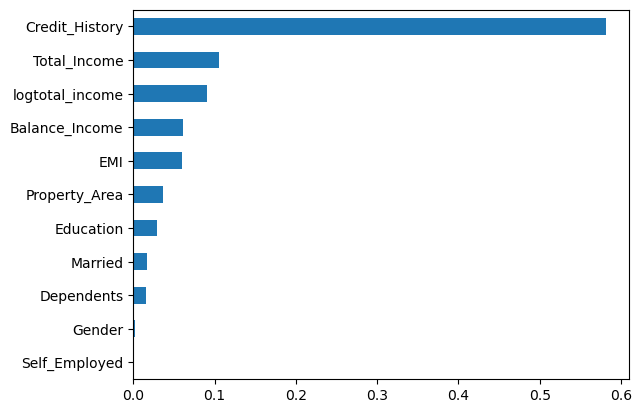

In [ ]:
importance=pd.Series(model.feature_importances_,index=X.columns).sort_values(ascending=True).plot(kind='barh')

In [ ]:
cols=['loanamount_log','Total_Income','logtotal_income','EMI','Balance_Income']

In [ ]:
X[cols]=train[cols]

Text(50.722222222222214, 0.5, 'Actual')

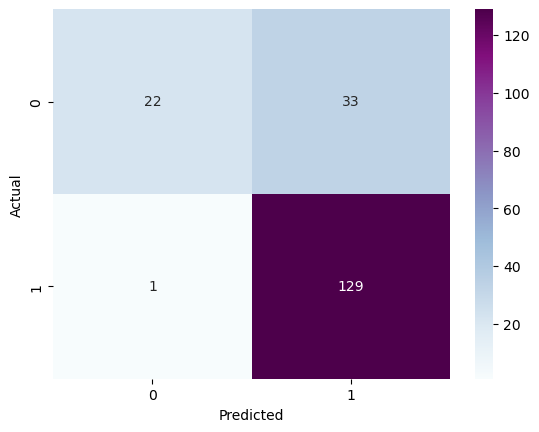

In [ ]:
from sklearn.metrics import confusion_matrix # we can see false negatives are more
cm=confusion_matrix(y_cv,pred_cv)
sns.heatmap(cm,annot=True,cmap='BuPu',fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_cv,pred_cv))

              precision    recall  f1-score   support

           0       0.96      0.40      0.56        55
           1       0.80      0.99      0.88       130

    accuracy                           0.82       185
   macro avg       0.88      0.70      0.72       185
weighted avg       0.84      0.82      0.79       185



In [ ]:
from imblearn.over_sampling import SMOTE #oversampling
smote=SMOTE(random_state=5)
x_train_resampled, y_train_resampled = smote.fit_resample(x_train, y_train)
x_cv_resampled, y_cv_resampled = smote.fit_resample(x_cv, y_cv)
model.fit(x_train_resampled,y_train_resampled)

RandomForestClassifier(max_depth=10, random_state=5)

In [ ]:
pred_test=model.predict(x_cv_resampled)
accuracy_score(y_cv_resampled,pred_test)

0.7538461538461538

Text(50.722222222222214, 0.5, 'Actual')

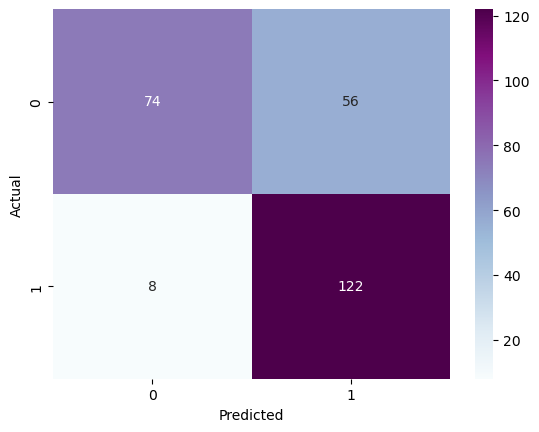

In [ ]:
from sklearn.metrics import confusion_matrix # we can see false negatives are more
cm=confusion_matrix(y_cv_resampled,pred_test)
sns.heatmap(cm,annot=True,cmap='BuPu',fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')

In [ ]:
pred_proba1=model.predict_proba(x_cv_resampled)[:,1]
adjusted_threshold=0.3
pred_proba1_adjusted=(pred_proba1>adjusted_threshold).astype(int)

In [ ]:
pred_proba1_adjusted

array([0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0])

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_cv_resampled,pred_proba1_adjusted))

              precision    recall  f1-score   support

           0       0.89      0.45      0.60       130
           1       0.63      0.95      0.76       130

    accuracy                           0.70       260
   macro avg       0.76      0.70      0.68       260
weighted avg       0.76      0.70      0.68       260



In [ ]:
pred_test=model.predict(test)

In [ ]:
submission['Loan_Status']=pred_test
submission['Loan_ID']=test_original['Loan_ID']
submission['Loan_Status'].replace(0, 'N',inplace=True)
submission['Loan_Status'].replace(1, 'Y',inplace=True)

In [ ]:
pd.DataFrame(submission, columns=['Loan_ID','Loan_Status']).to_csv('lghyperparametertuning.csv')

In [ ]:
from sklearn.model_selection import GridSearchCV
model = LogisticRegression()
param_grid = {'penalty':['l1','l2','elasticnet','none'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
}
grid_search = GridSearchCV(model,param_grid,scoring='accuracy',verbose=0)
grid_search.fit(x_train,y_train)


GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'penalty': ['l1', 'l2', 'elasticnet', 'none'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             scoring='accuracy')

In [ ]:
grid_search.best_estimator_

LogisticRegression(C=0.001, penalty='none', solver='newton-cg')

In [ ]:
grid_search.best_score_ # score without penalty is high so we are not proceeding with this

0.8112995896032832

In [ ]:
model=LogisticRegression(C=0.001,penalty='none',solver='newton-cg')
model.fit(x_train,y_train)
pred_test=model.predict(x_cv)
accuracy_score(y_cv,pred_test)

0.8054054054054054

# Xgboost

In [ ]:
# Install xgboost using pip directly in Jupyter Notebook
!pip install xgboost


                                              0.0/99.8 MB ? eta -:--:--
                                              0.5/99.8 MB 15.2 MB/s eta 0:00:07
                                              1.8/99.8 MB 22.4 MB/s eta 0:00:05
     -                                        3.3/99.8 MB 23.5 MB/s eta 0:00:05
     --                                       5.1/99.8 MB 27.1 MB/s eta 0:00:04
     --                                       7.4/99.8 MB 33.9 MB/s eta 0:00:03
     ---                                      7.5/99.8 MB 28.3 MB/s eta 0:00:04
     ---                                     10.1/99.8 MB 30.7 MB/s eta 0:00:03
     ----                                    11.6/99.8 MB 36.4 MB/s eta 0:00:03
     ----                                    12.7/99.8 MB 34.4 MB/s eta 0:00:03
     -----                                   14.3/99.8 MB 34.4 MB/s eta 0:00:03
     -----                                   15.0/99.8 MB 32.7 MB/s eta 0:00:03
     ------                                  16.

In [ ]:
cols=['Total_Income','logtotal_income','EMI','Balance_Income']

In [ ]:
from sklearn.preprocessing import StandardScaler #feature scaling
st=StandardScaler()
X[cols]=st.fit_transform(X[cols])

In [ ]:
train['Dependents']=train['Dependents'].astype('int')
test['Dependents']=test['Dependents'].astype('int')
X['Dependents']=X['Dependents'].astype('int')
train_x['Dependents']=train_x['Dependents'].astype('int')

In [ ]:
from xgboost import XGBClassifier
i=1
sc=[]
kf = StratifiedKFold(n_splits=5,random_state=5,shuffle=True)
for train_index,test_index in kf.split(X,y):
    print('n{} of kfold {}'.format(i,kf.n_splits))
    train_x,val_x = X.loc[train_index],X.loc[test_index]
    train_y,val_y = y[train_index],y[test_index]
    model = XGBClassifier(
 learning_rate =0.01,
 n_estimators=100,
 max_depth=5,
 min_child_weight=7,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1,
 seed=27)
    model.fit(train_x, train_y)
    pred_test = model.predict(val_x)
    score = accuracy_score(val_y,pred_test)
    print('accuracy_score',score)
    sc.append(score)
    i+=1

n1 of kfold 5
accuracy_score 0.7967479674796748
n2 of kfold 5
accuracy_score 0.7479674796747967
n3 of kfold 5
accuracy_score 0.8373983739837398
n4 of kfold 5
accuracy_score 0.8130081300813008
n5 of kfold 5
accuracy_score 0.8524590163934426


In [ ]:
print('mean:',sum(sc)/len(sc))

mean: 0.8095161935225909


In [ ]:
pred_test_xg=model.predict(val_x)
accuracy_score(val_y,pred_test_xg)

0.8524590163934426

In [ ]:
pred_testxgb=model.predict(test)

In [ ]:
submission['Loan_Status']=pred_testxgb
submission['Loan_ID']=test_original['Loan_ID']
submission['Loan_Status'].replace(0, 'N',inplace=True)
submission['Loan_Status'].replace(1, 'Y',inplace=True)

In [ ]:
pd.DataFrame(submission, columns=['Loan_ID','Loan_Status']).to_csv('XGboost.csv')

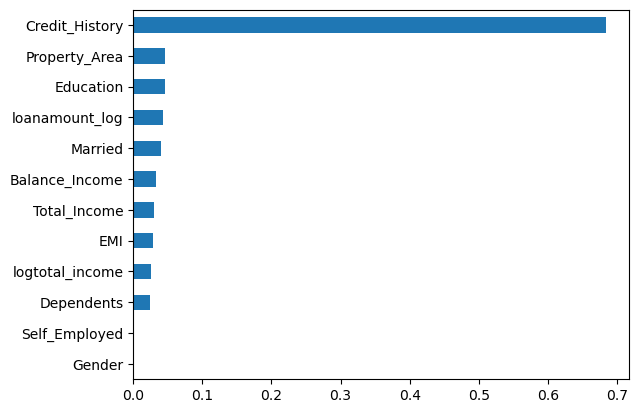

In [ ]:
importance=pd.Series(model.feature_importances_,index=X.columns).sort_values(ascending=True).plot(kind='barh')

In [ ]:
X.drop(['Gender','Self_Employed'],axis=1,inplace=True)
test.drop(['Gender','Self_Employed'],axis=1,inplace=True)

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_cv,y_train,y_cv= train_test_split(X,y,test_size=0.2)

In [ ]:
model1=XGBClassifier(
 learning_rate =0.01,
 n_estimators=100,
 max_depth=5,
 min_child_weight=7,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1,
 seed=27)
model1.fit(x_train,y_train)
pred_test=model.predict(x_cv)
accuracy_score(y_cv,pred_test)

0.8292682926829268

In [ ]:
import pickle #saving the model
pickle_out=open('classifier.pkl',mode='wb')
pickle.dump(model,pickle_out)
pickle_out.close()

In [1]:
!pip install -q pyngrok
!pip install -q streamlit
!pip install -q streamlit_ace

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.4/8.4 MB 14.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.4/196.4 kB 13.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 27.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.1/82.1 kB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 9.8 MB/s eta 0:00:00


In [87]:
%%writefile app.py

import pickle
import streamlit as st
import numpy as np

# loading the trained model
pickle_in = open('classifier.pkl1', 'rb')
classifier = pickle.load(pickle_in)

@st.cache_data()
def prediction(Married, Education,
               Credit_History, Property_Area, Total_Income, LoanAmount,Loan_Amount_Term,logtotal_income,EMI,Balance_Income):

    EMI=(LoanAmount/Loan_Amount_Term)
    Balance_Income=(Total_Income-EMI)
    logtotal_income=np.log(Total_Income)
    # Pre-processing user input
    if Education == "Not Graduate":
        Education = 0
    else:
        Education = 1

    if Married == "Unmarried":
        Married = 0
    else:
        Married = 1

    if Credit_History == "Unclear Debts":
        Credit_History = 0
    else:
        Credit_History = 1

    if Property_Area == "Rural":
        Property_Area = 0
    elif Property_Area == "Urban":
        Property_Area = 1
    else:
        Property_Area = 2

    # Making predictions
    prediction = classifier.predict([[Married, Education, Credit_History, Property_Area, Total_Income, LoanAmount,Loan_Amount_Term,logtotal_income,EMI,Balance_Income]])

    if prediction == 0:
        pred = 'Rejected'
    else:
        pred = 'Approved'
    return pred

# this is the main function in which we define our webpage
def main():
    # front end elements of the web page
    html_temp = """
    <div style ="background-color:yellow;padding:13px">
    <h1 style ="color:black;text-align:center;">Loan Prediction ML App</h1>
    </div>
    """
    # display the front end aspect
    st.markdown(html_temp, unsafe_allow_html=True)

    # following lines create boxes in which the user can enter data required to make a prediction
    Married = st.selectbox('Marital Status', ["Unmarried", "Married"])
    Education = st.selectbox('Education', ["Not Graduate", "Graduate"])
    Credit_History = st.selectbox('Credit History', ["Unclear Debts", "No Unclear Debts"])
    Property_Area = st.selectbox('Property Area', ["Urban", "Semiurban", "Rural"])
    LoanAmount = st.number_input("Total Loan Amount", min_value=0)
    Total_Income = int(st.number_input("Total Monthly Income", min_value=0))
    Loan_Amount_Term=st.number_input("Loan Term",min_value=1)
    EMI=(LoanAmount/Loan_Amount_Term)
    Balance_Income=(Total_Income-EMI)
    logtotal_income=np.log(Total_Income)

    # when 'Predict' is clicked, make the prediction and store it
    if st.button("Predict"):
        result =prediction(Married, Education,
               Credit_History, Property_Area, Total_Income, LoanAmount,Loan_Amount_Term,logtotal_income,EMI,Balance_Income)

        # Styling for different colors and font size
        if result == 'Rejected':
            result_html = f'<p style="color:red; font-size:40px;">Your loan is {result}</p>'
        else:
            result_html = f'<p style="color:green; font-size:40px;">Your loan is {result}</p>'

        # Display the result
        st.markdown(result_html, unsafe_allow_html=True)

if __name__=='__main__':
    main()


Overwriting app.py


In [76]:
!streamlit run app.py &>/dev/null&

In [77]:
from pyngrok import ngrok

public_url = ngrok.connect('8501')
public_url

<NgrokTunnel: "https://9a39-35-231-157-213.ngrok-free.app" -> "http://localhost:8501">

In [ ]:
%run -i app.py


In [9]:
from pyngrok import ngrok

# Set the authtoken to authenticate with ngrok
ngrok.set_auth_token("2bno6JKvcry39gLg17dISBRjk5K_3MkH7XUFaTQzWvHYCeFFs")

# Connect to ngrok
public_url = ngrok.connect('8080')
print('Ngrok Tunnel "http://127.0.0.1:4040" -> "{}"'.format(public_url))


Ngrok Tunnel "http://127.0.0.1:4040" -> "NgrokTunnel: "https://1c8f-35-231-157-213.ngrok-free.app" -> "http://localhost:8080""


In [8]:
import os
import pickle

# Get the path to 'classifier.pkl' in the Colab environment
file_path = '/content/classifier.pkl'  # Update this path based on the actual location in Colab

# Check if the file exists
if os.path.exists(file_path):
    # Open the file in binary read mode
    with open(file_path, 'rb') as pickle_file:
        # Load the model from the pickled file
        classifier = pickle.load(pickle_file)
else:
    print(f"The file '{file_path}' does not exist.")
